<a href="https://colab.research.google.com/github/ShivinM-17/Audio-signal-processing-python/blob/main/plotting_fourier_transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the necessary libraries

In [1]:
import cmath
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# making a function to create a signal (with same phase)
def create_signal(frequency, time):
  sin1 = np.sin(2 * np.pi * (frequency * time))
  sin2 = np.sin(2 * np.pi * (2 * frequency * time))
  sin3 = np.sin(2 * np.pi * (3 * frequency * time))

  return sin1 + sin2 + sin3

In [3]:
# calculate center of gravity
def calculate_centre_of_gravity(multi_signal):
  x_centre = np.mean([x.real for x in multi_signal])
  y_centre = np.mean([x.imag for x in multi_signal])

  return x_centre, y_centre

In [4]:
# calculate sum of the complex number
def calculate_sum(multi_signal):
  x_sum = np.sum([x.real for x in multi_signal])
  y_sum = np.sum([x.imag for x in multi_signal])

  return x_sum, y_sum

In [5]:
# making a function to create a pure tone
def create_pure_tone(frequency, time):
  angle = -2 * np.pi * frequency * time
  return np.cos(angle) + 1j * np.sin(angle)

In [35]:
# making a function to plot the fourier tranform
def plot_fourier_transform(pure_tone_frequency,
                           signal_frequency,
                           time,
                           plot_centre_of_gravity=False,
                           plot_sum=False):
  # Create sinusoid and signal
  pure_tone = create_pure_tone(pure_tone_frequency, time)
  signal = create_signal(signal_frequency, time)

  # multiply pure tone and signal frequency
  multi_signal = pure_tone * signal

  # Getting the list of real and imaginary parts of the frequencies
  X = [x.real for x in multi_signal]
  Y = [x.imag for x in multi_signal]

  # Now, plotting the figures
  plt.figure(figsize=(15,10))
  plt.plot(X,Y, 'o',markersize=1)

  # Calculate and plot center of gravity
  if plot_centre_of_gravity:
    centre_of_gravity = calculate_centre_of_gravity(multi_signal)
    plt.plot([centre_of_gravity[0]],[centre_of_gravity[1]],
             marker='o', markersize=6, color='red')

  # Calculate and plot sum
  if plot_sum:
    integral = calculate_sum(multi_signal)
    plt.plot([integral[0]],[integral[1]], marker='o',
             markersize=6, color='green')

  # setting the origin axes
  ax = plt.gca()
  ax.grid(True)
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_color('none')

  if not plot_sum:
    plt.xlim(-3,3)
    plt.ylim(-3,3)

  plt.show()

In [32]:
# making a function to plot a signal
def plot_signal(signal, time):
  plt.figure(figsize=(15,10))
  plt.plot(time, signal)
  plt.xlabel("Time")
  plt.ylabel("Intensity")
  plt.show()

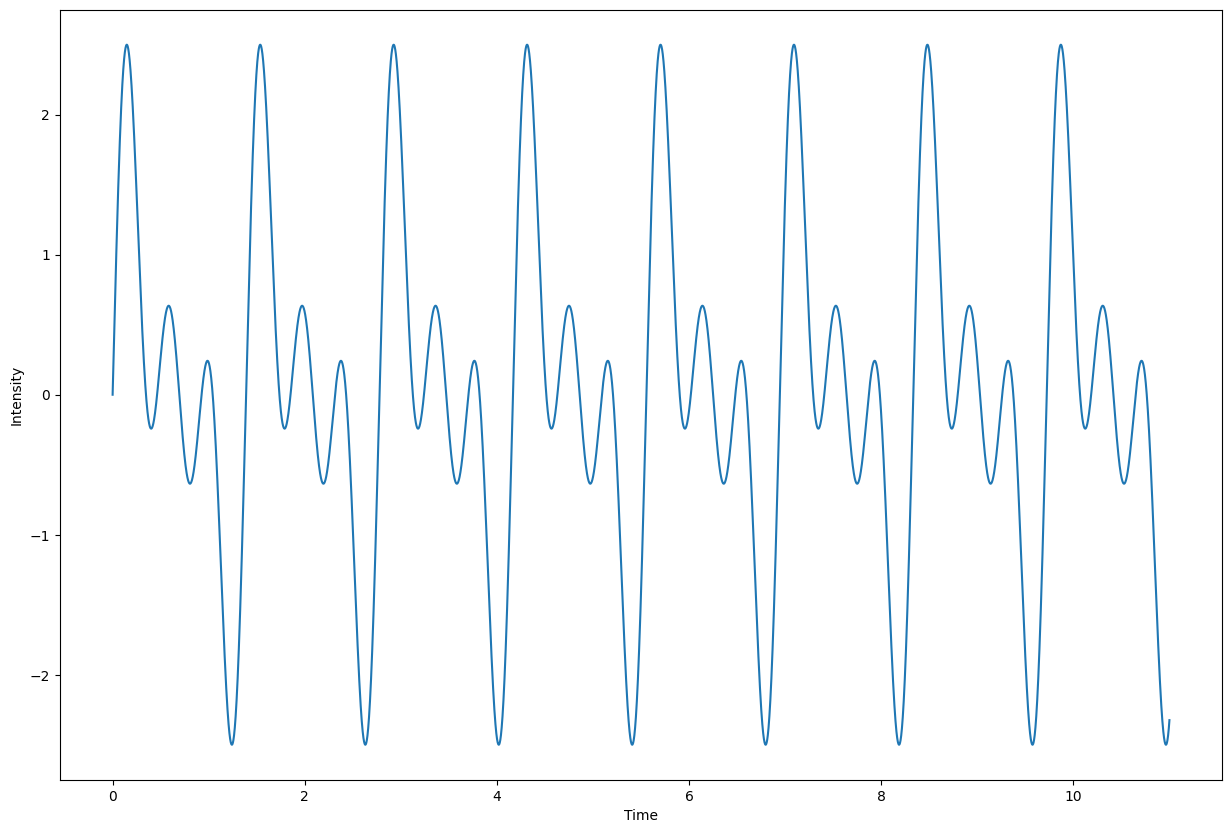

In [33]:
time = np.linspace(0,11,10000)
signal = create_signal(frequency=0.72, time=time)
plot_signal(signal,time)

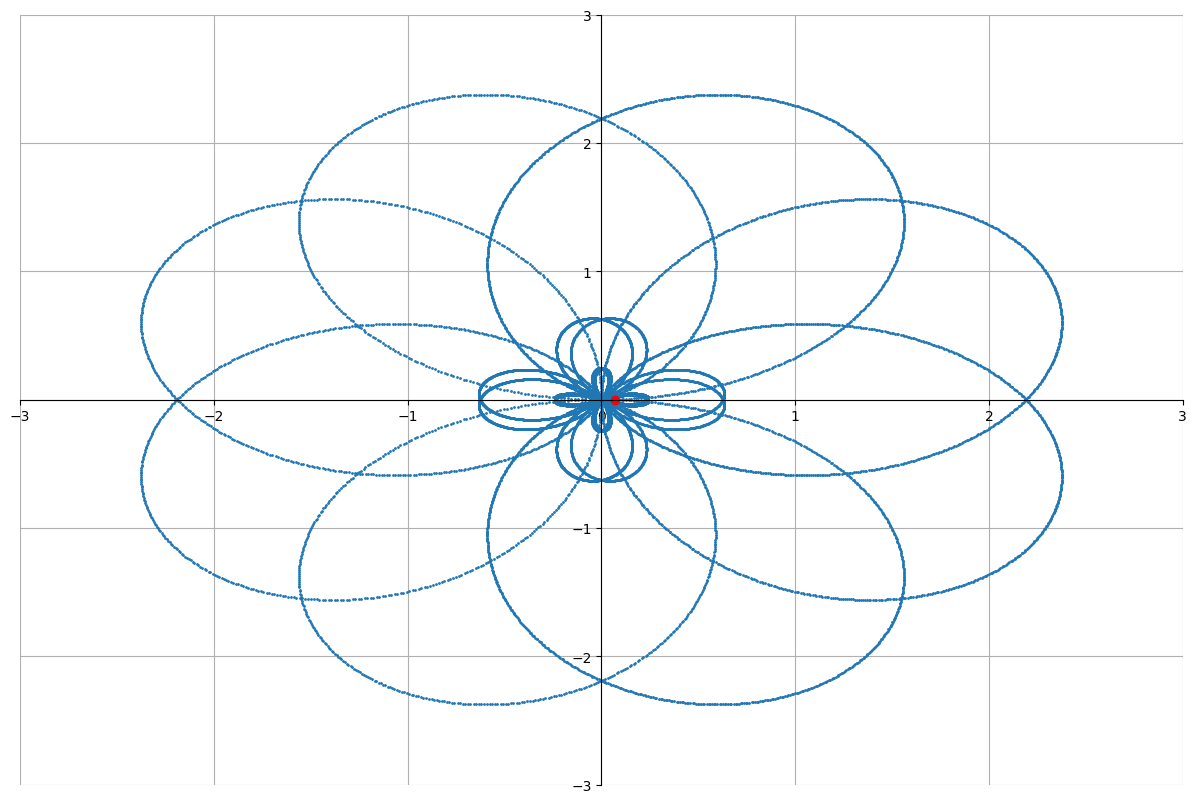

In [63]:
time = np.linspace(0,10,10000)
plot_fourier_transform(pure_tone_frequency=1.75,
                       signal_frequency=1,
                       time=time,
                       plot_centre_of_gravity=True,
                       plot_sum=False)

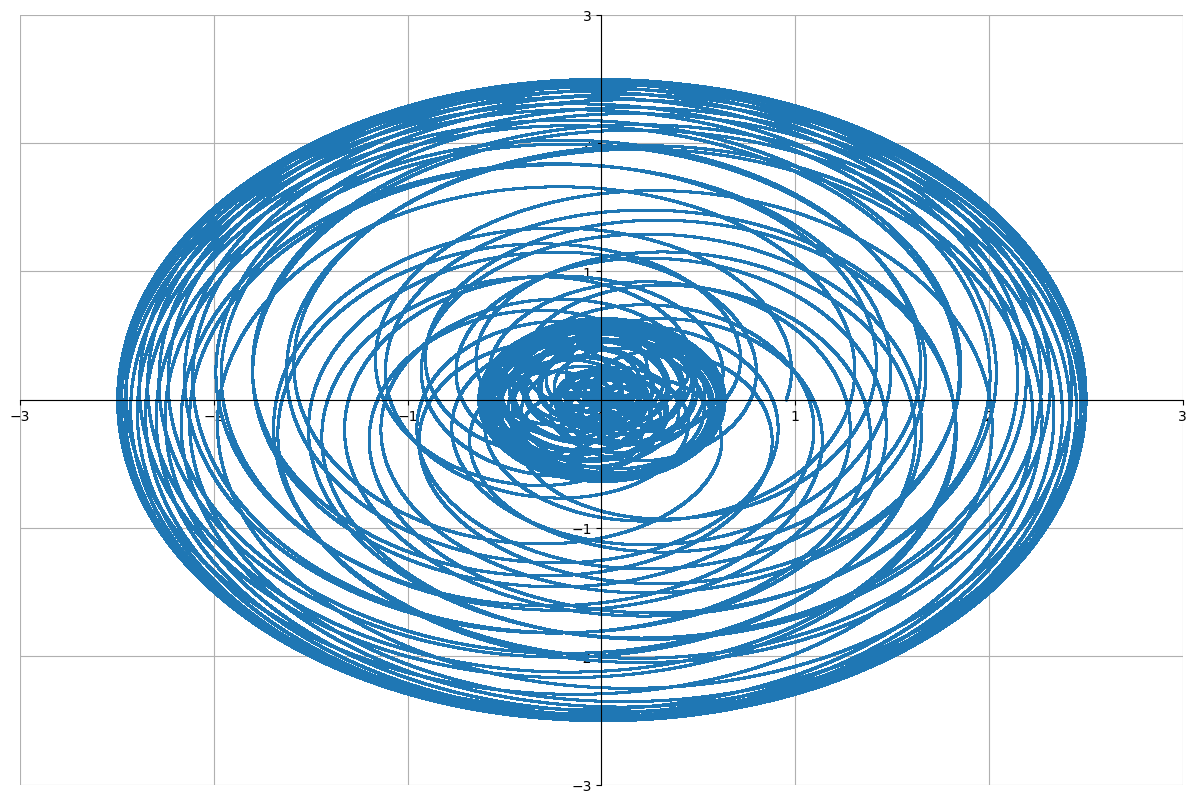

In [50]:
time = np.linspace(0,1,10000000)
plot_fourier_transform(pure_tone_frequency=100,
                       signal_frequency=6.2,
                       time=time)